# Human Resources Analytics - Milestone Report
***

**"Yeah, they all said that to me..."**, *Bob replied as we were at Starbucks sipping on our dark roast coffee. Bob is a friend of mine and was the owner of a multi-million dollar company, that's right, "m-i-l-l-i-o-n". He used to tell me stories about how his company's productivity and growth has sky rocketed from the previous years and everything has been going great. But recently, he's been noticing some decline within his company. In a five month period, he lost one-fifth of his employees. At least a dozen of them throughout each department made phone calls and even left sticky notes on their tables informing him about their leave. Nobody knew what was happening. In that year, he was contemplating about filing for bankruptcy. Fast-forward seven months later, he's having a conversation with his co-founder of the company. The conversation ends with, **"I quit..."***

That is the last thing anybody wants to hear from their employees. In a sense, it’s the employees who make the company. It’s the employees who do the work. It’s the employees who shape the company’s culture. Long-term success, a healthy work environment, and high employee retention are all signs of a successful company. But when a company experiences a high rate of employee turnover, then something is going wrong. This can lead the company to huge monetary losses by these innovative and valuable employees.

Companies that maintain a healthy organization and culture are always a good sign of future prosperity. Recognizing and understanding what factors that were associated with employee turnover will allow companies and individuals to limit this from happening and may even increase employee productivity and growth. These predictive insights give managers the opportunity to take corrective steps to build and preserve their successful business.

** "You don't build a business. You build people, and people build the business." - Zig Ziglar**
***

<img src="https://static1.squarespace.com/static/5144a1bde4b033f38036b7b9/t/56ab72ebbe7b96fafe9303f5/1454076676264/"/>

## About This Kernel
***

*Hopefully the kernel added some new insights/perspectives to the data science community! If there are any suggestions/changes you would like to see in the Kernel please let me know :). Appreciate every ounce of help!* **#KernelsAward #Kaggle**

*This notebook will always be a work in progress. Please leave any comments about further improvements to the notebook! Any feedback or constructive criticism is greatly appreciated!. Thank you guys!*

## Business Problem
***
*Bob's multi-million dollar company is about to go bankrupt and he wants to know why his employees are leaving.*

## Objective
***
*My goal is to understand what factors contribute most to employee turnover analysis.*

# Part 1: Obtaining the Data
***

In [15]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
!unzip /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip

unzip:  cannot find or open /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip, /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip.zip or /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip.ZIP.


In [18]:

df=pd.read_csv('/content/drive/MyDrive/HR_comma_sep.csv')

# Part 2: Scrubbing the Data
***

*Typically, cleaning the data requires a lot of work and can be a very tedious procedure. This dataset from Kaggle is super clean and contains no missing values. But still, I will have to examine the dataset to make sure that everything else is readable and that the observation values match the feature names appropriately.*

In [19]:
# Check to see if there are any missing values in our data set
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [20]:
# Get a quick overview of what we are dealing with in our dataset
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [21]:
# Renaming certain columns for better readability
df = df.rename(columns={'satisfaction_level': 'satisfaction',
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [22]:
# Move the reponse variable "turnover" to the front of the table
front = df['turnover']
df.drop(labels=['turnover'], axis=1,inplace = True)
df.insert(0, 'turnover', front)
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


# Part 3: Exploring the Data
***
 <img  src="https://s-media-cache-ak0.pinimg.com/originals/32/ef/23/32ef2383a36df04a065b909ee0ac8688.gif"/>

##  3a. Statistical Overview
***
The dataset has:
 - About 15,000 employee observations and 10 features
 - The company had a turnover rate of about 24%
 - Mean satisfaction of employees is 0.61

In [23]:
# The dataset contains 10 columns and 14999 observations
df.shape

(14999, 10)

In [24]:
# Check the type of our features.
df.dtypes

turnover                 int64
satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
department              object
salary                  object
dtype: object

In [25]:
# Looks like about 76% of employees stayed and 24% of employees left.
# NOTE: When performing cross validation, its important to maintain this turnover ratio
turnover_rate = df.turnover.value_counts() / 14999
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [26]:
# Display the statistical overview of the employees
df.describe()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [27]:
# Overview of summary (Turnover V.S. Non-turnover)
turnover_Summary = df.groupby('turnover')
turnover_Summary.mean()

<ipython-input-27-92fc9db6b6cc>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  turnover_Summary.mean()


,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


##  3b. Correlation Matrix & Heatmap
***
**Moderate Positively Correlated Features:**
- projectCount vs evaluation: 0.349333
- projectCount vs averageMonthlyHours:  0.417211
- averageMonthlyHours vs evaluation: 0.339742

**Moderate Negatively Correlated Feature:**
 - satisfaction vs turnover:  -0.388375

**Stop and Think:**
- What features affect our target variable the most (turnover)?
- What features have strong correlations with each other?
- Can we do a more in depth examination of these features?

**Summary:**

From the heatmap, there is a **positive(+)** correlation between projectCount, averageMonthlyHours, and evaluation. Which could mean that the employees who spent more hours and did more projects were evaluated highly.

For the **negative(-)** relationships, turnover and satisfaction are highly correlated. I'm assuming that people tend to leave a company more when they are less satisfied.

<ipython-input-46-faf582636014>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
satisfaction,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
projectCount,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
averageMonthlyHours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
yearsAtCompany,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
workAccident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


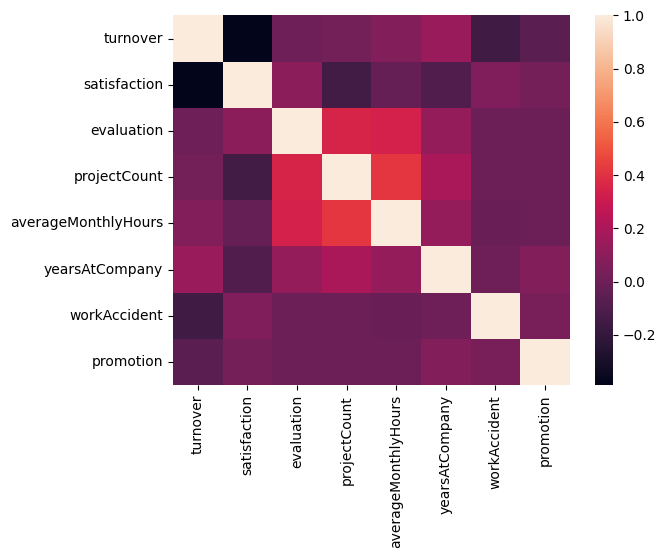

In [46]:
import seaborn as sns
#Correlation Matrix
corr = df.corr()
corr = (corr)
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
#sns.plt.title('Heatmap of Correlation Matrix')
corr

## 3b2. Statistical Test for Correlation
***

### One-Sample T-Test (Measuring Satisfaction Level)
A one-sample t-test checks whether a sample mean differs from the population mean. Let's test to see whether the average satisfaction level of employees that had a turnover differs from the entire employee population.

**Hypothesis Testing:** Is there significant difference in the **means of satisfaction level** between employees who had a turnover and the entire employee population?

 - **Null Hypothesis:** *(H0: pTS = pES)* The null hypothesis would be that there is **no** difference in satisfaction level between employees who did turnover and the entire employee population.

 - **Alternate Hypothesis:** *(HA: pTS != pES)* The alternative hypothesis would be that there **is** a difference in satisfaction level between employees who did turnover and the entire employee population.

In [30]:
# Let's compare the means of our employee turnover satisfaction against the employee population satisfaction
emp_population_satisfaction = df['satisfaction'].mean()
emp_turnover_satisfaction = df[df['turnover']==1]['satisfaction'].mean()

print( 'The mean for the employee population is: ' + str(emp_population_satisfaction) )
print( 'The mean for the employees that had a turnover is: ' + str(emp_turnover_satisfaction) )

The mean for the employee population is: 0.6128335222348156
The mean for the employees that had a turnover is: 0.4400980117614114


### Conducting the T-Test
***
Let's conduct a t-test at **95% confidence level** and see if it correctly rejects the null hypothesis that the sample comes from the same distribution as the employee population. To conduct a one sample t-test, we can use the **stats.ttest_1samp()** function:

In [31]:
import scipy.stats as stats
stats.ttest_1samp(a=  df[df['turnover']==1]['satisfaction'], # Sample of Employee satisfaction who had a Turnover
                  popmean = emp_population_satisfaction)  # Employee Population satisfaction mean

TtestResult(statistic=-39.10948894348423, pvalue=9.0127811954355e-279, df=3570)

### T-Test Result
***
The test result shows the **test statistic "t" is equal to -39.109**. This test statistic tells us how much the sample mean deviates from the null hypothesis. If the t-statistic lies **outside** the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis. We can check the quantiles with **stats.t.ppf()**:

### T-Test Quantile
***
If the t-statistic value we calculated above **(-39.109)** is outside the quantiles, then we can reject the null hypothesis

In [32]:
degree_freedom = len(df[df['turnover']==1])

LQ = stats.t.ppf(0.025,degree_freedom)  # Left Quartile

RQ = stats.t.ppf(0.975,degree_freedom)  # Right Quartile

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))


The t-distribution left quartile range is: -1.9606285215955626
The t-distribution right quartile range is: 1.9606285215955621


### One-Sample T-Test Summary
***
#### **T-Test = -39.109**       |        **P-Value = 9.01e-279**       |       **Reject Null Hypothesis**

**Reject the null hypothesis because:**
 - T-Test score is outside the quantiles
 - P-value is lower than confidence level of 5%

Based on the statistical analysis of a one sample t-test, there seems to be some significant difference between the mean satisfaction of employees who had a turnover and the entire employee population. The super low P-value of **9.012e-279** at a 5% confidence level is a good indicator to **reject the null hypothesis**.

But this does not neccessarily mean that there is practical significance. We would have to conduct more experiments or maybe collect more data about the employees in order to come up with a more accurate finding.

<img src="https://static1.squarespace.com/static/5144a1bde4b033f38036b7b9/t/56714b05c647ad9f555348fa/1450265419456/PresentWIP.gif?format=500w"/>

##  3c. Distribution Plots (Satisfaction - Evaluation - AverageMonthlyHours)
***
**Summary:** Let's examine the distribution on some of the employee's features. Here's what I found:
 - **Satisfaction** - There is a huge spike for employees with low satisfaction and high satisfaction.
 - **Evaluation** - There is a bimodal distrubtion of employees for low evaluations (less than 0.6) and high evaluations (more than 0.8)
 - **AverageMonthlyHours** - There is another bimodal distribution of employees with lower and higher average monthly hours (less than 150 hours & more than 250 hours)
 - The evaluation and average monthly hour graphs both share a similar distribution.
 - Employees with lower average monthly hours were evaluated less and vice versa.
 - If you look back at the correlation matrix, the high correlation between evaluation and averageMonthlyHours does support this finding.

**Stop and Think:**
 - Is there a reason for the high spike in low satisfaction of employees?
 - Could employees be grouped in a way with these features?
 - Is there a correlation between evaluation and averageMonthlyHours?

<ipython-input-33-4fb399fcb39d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
<ipython-input-33-4fb399fcb39d>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.evaluation, kde=False, color="r"

Text(0, 0.5, 'Employee Count')

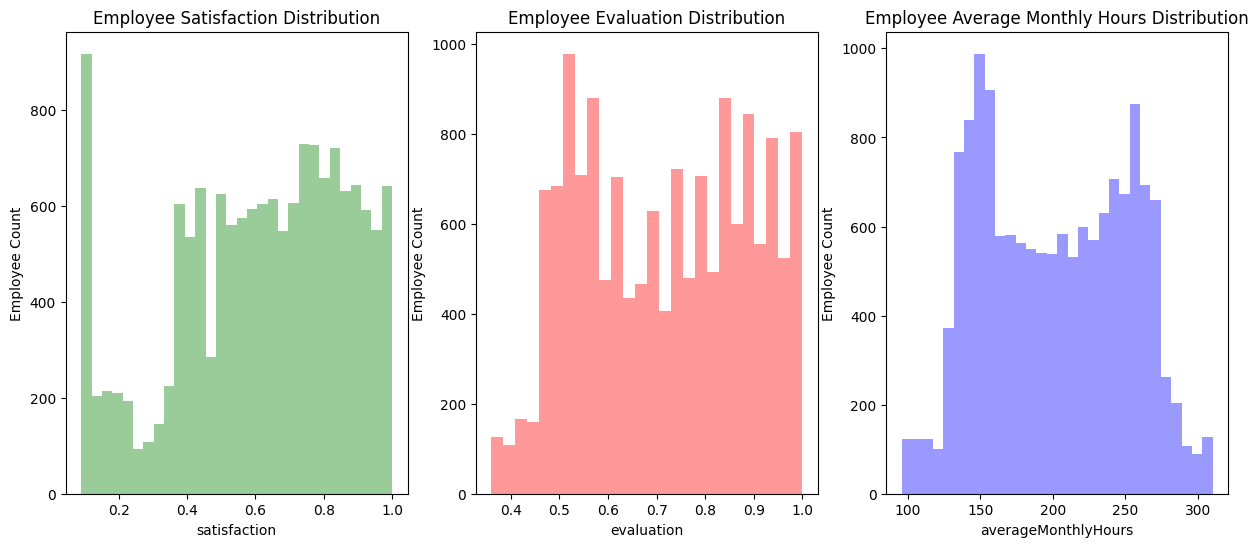

In [33]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(df.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Evaluation
sns.distplot(df.evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.distplot(df.averageMonthlyHours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

##  3d. Salary V.S. Turnover
***
**Summary:** This is not unusual. Here's what I found:
 - Majority of employees who left either had **low** or **medium** salary.
 - Barely any employees left with **high** salary
 - Employees with low to average salaries tend to leave the company.

**Stop and Think:**
 - What is the work environment like for low, medium, and high salaries?
 - What made employees with high salaries to leave?

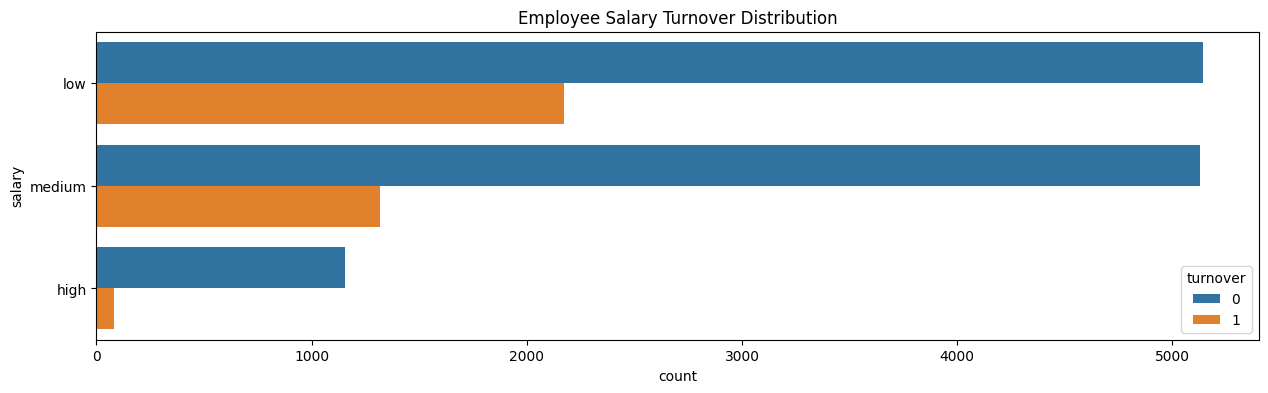

In [34]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='turnover', data=df).set_title('Employee Salary Turnover Distribution');

<img src="https://cdn.dribbble.com/users/20727/screenshots/2118641/video-producer-motion-graphics-designer-animator-jobs-manchester-uk.gif"/>

##  3e. Department V.S. Turnover
***
**Summary:** Let's see more information about the departments. Here's what I found:
 - The **sales, technical, and support department** were the top 3 departments to have employee turnover
 - The management department had the smallest amount of turnover

**Stop and Think:**
 - If we had more information on each department, can we pinpoint a more direct cause for employee turnover?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'sales'),
  Text(1, 0, 'accounting'),
  Text(2, 0, 'hr'),
  Text(3, 0, 'technical'),
  Text(4, 0, 'support'),
  Text(5, 0, 'management'),
  Text(6, 0, 'IT'),
  Text(7, 0, 'product_mng'),
  Text(8, 0, 'marketing'),
  Text(9, 0, 'RandD')])

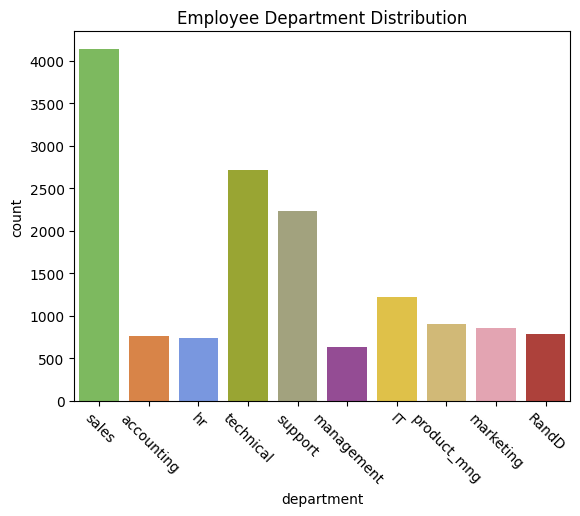

In [35]:
# Employee distri
# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='department', data=df, palette=color_types).set_title('Employee Department Distribution');

# Rotate x-labels
plt.xticks(rotation=-45)

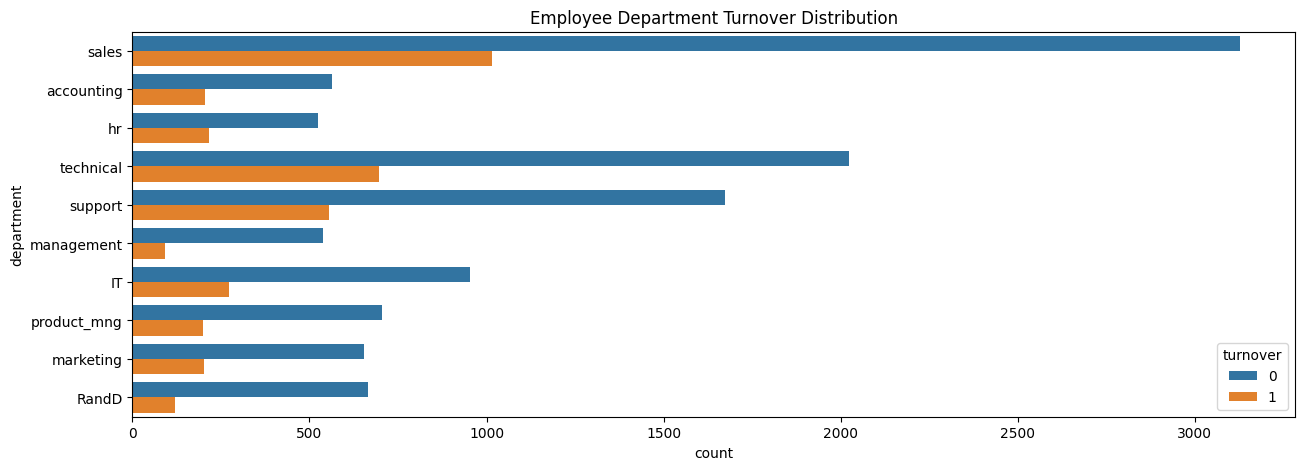

In [36]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="department", hue='turnover', data=df).set_title('Employee Department Turnover Distribution');

##  3f. Turnover V.S. ProjectCount
***
**Summary:** This graph is quite interesting as well. Here's what I found:
 - More than half of the employees with **2,6, and 7** projects left the company
 - Majority of the employees who did not leave the company had **3,4, and 5** projects
 - All of the employees with **7** projects left the company
 - There is an increase in employee turnover rate as project count increases

**Stop and Think:**
 - Why are employees leaving at the lower/higher spectrum of project counts?
 - Does this means that employees with project counts 2 or less are not worked hard enough or are not highly valued, thus leaving the company?
 - Do employees with 6+ projects are getting overworked, thus leaving the company?



[Text(0, 0.5, 'Percent')]

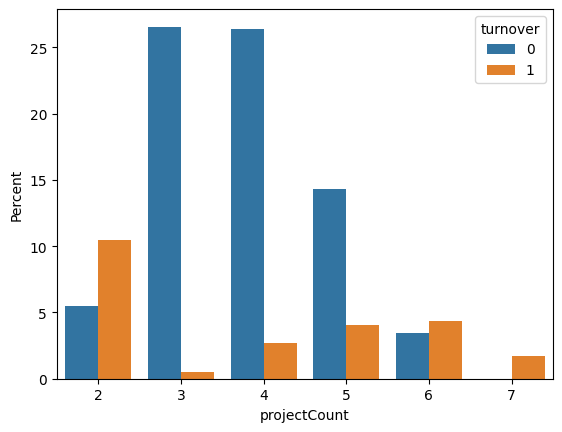

In [37]:
ax = sns.barplot(x="projectCount", y="projectCount", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

##  3g. Turnover V.S. Evaluation
***
**Summary:**
 - There is a biomodal distribution for those that had a turnover.
 - Employees with **low** performance tend to leave the company more
 - Employees with **high** performance tend to leave the company more
 - The **sweet spot** for employees that stayed is within **0.6-0.8** evaluation

<ipython-input-38-a25c65d9477c>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'evaluation'] , color='b',shade=True,label='no turnover')
<ipython-input-38-a25c65d9477c>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'evaluation'] , color='r',shade=True, label='turnover')


Text(0.5, 1.0, 'Employee Evaluation Distribution - Turnover V.S. No Turnover')

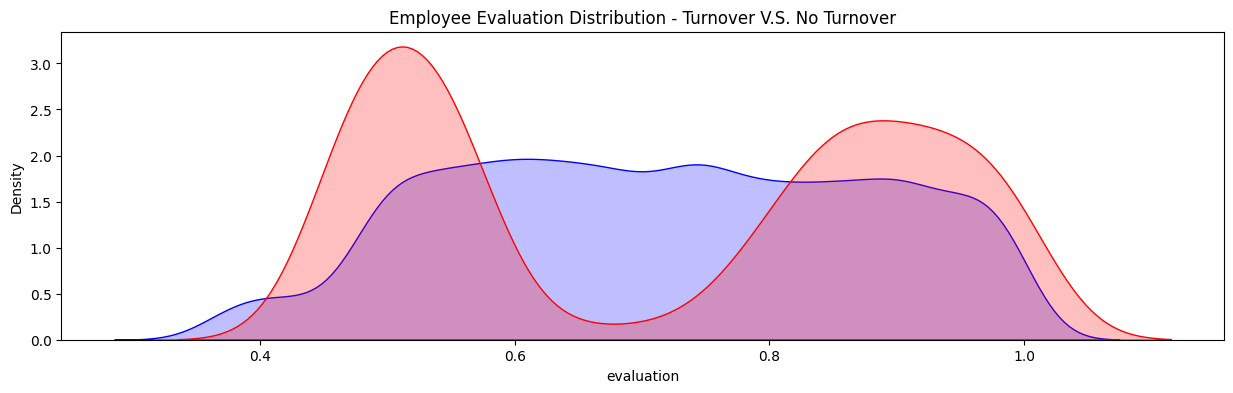

In [38]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'evaluation'] , color='r',shade=True, label='turnover')
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')

##  3h. Turnover V.S. AverageMonthlyHours
***
**Summary:**
 - Another bi-modal distribution for employees that turnovered
 - Employees who had less hours of work **(~150hours or less)** left the company more
 - Employees who had too many hours of work **(~250 or more)** left the company
 - Employees who left generally were **underworked** or **overworked**.

<ipython-input-39-4102d8f4d0a1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'averageMonthlyHours'] , color='b',shade=True, label='no turnover')
<ipython-input-39-4102d8f4d0a1>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'averageMonthlyHours'] , color='r',shade=True, label='turnover')


Text(0.5, 1.0, 'Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

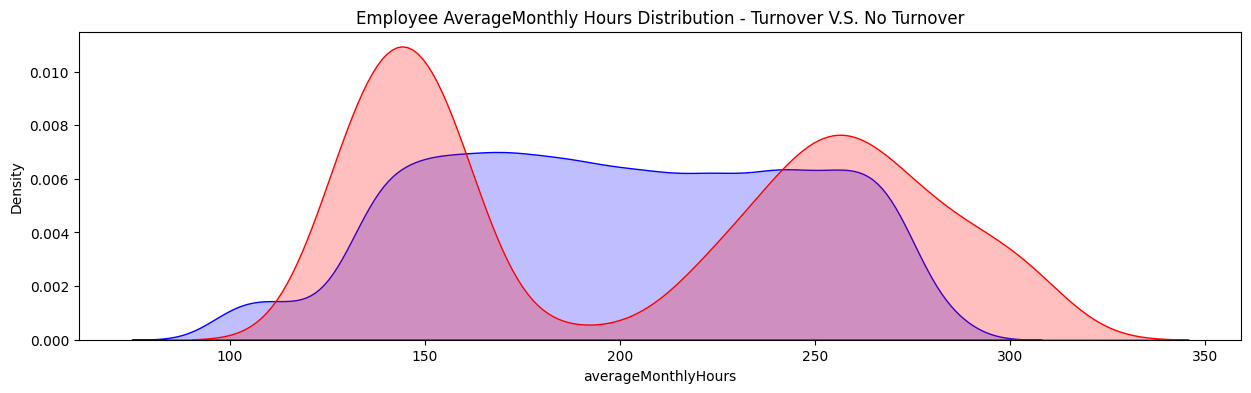

In [39]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'averageMonthlyHours'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'averageMonthlyHours'] , color='r',shade=True, label='turnover')
plt.title('Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

##  3i. Turnover V.S. Satisfaction
***
**Summary:**
 - There is a **tri-modal** distribution for employees that turnovered
 - Employees who had really low satisfaction levels **(0.2 or less)** left the company more
 - Employees who had low satisfaction levels **(0.3~0.5)** left the company more
 - Employees who had really high satisfaction levels **(0.7 or more)** left the company more

<ipython-input-40-a9c43a8d63a2>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'satisfaction'] , color='b',shade=True, label='no turnover')
<ipython-input-40-a9c43a8d63a2>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'satisfaction'] , color='r',shade=True, label='turnover')


Text(0.5, 1.0, 'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

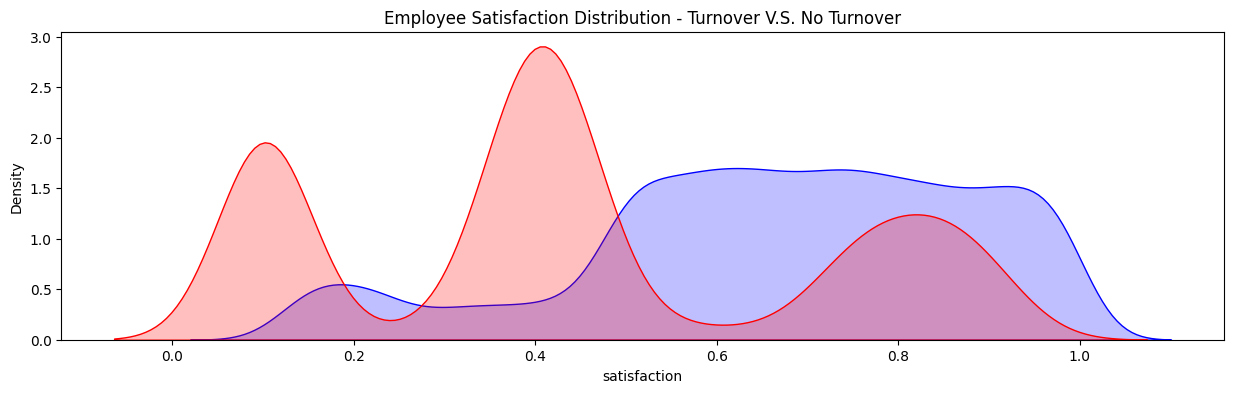

In [40]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'satisfaction'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'satisfaction'] , color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')

##  3j. ProjectCount VS AverageMonthlyHours
***

**Summary:**
 - As project count increased, so did average monthly hours
 - Something weird about the boxplot graph is the difference in averageMonthlyHours between people who had a turnver and did not.
 - Looks like employees who **did not** have a turnover had **consistent** averageMonthlyHours, despite the increase in projects
 - In contrast, employees who **did** have a turnover had an increase in averageMonthlyHours with the increase in projects

**Stop and Think:**
 - What could be the meaning for this?
 - **Why is it that employees who left worked more hours than employees who didn't, even with the same project count?**

<Axes: xlabel='projectCount', ylabel='averageMonthlyHours'>

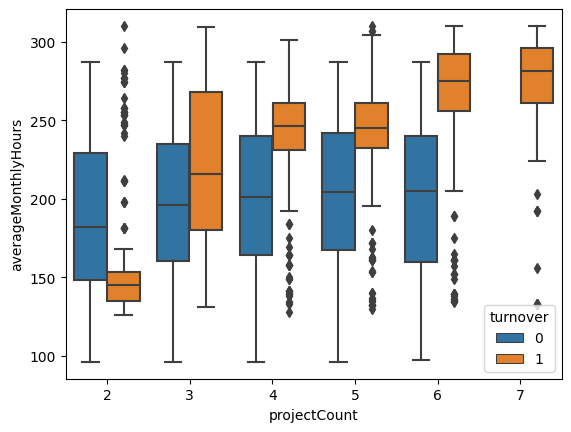

In [41]:
#ProjectCount VS AverageMonthlyHours [BOXPLOT]
#Looks like the average employees who stayed worked about 200hours/month. Those that had a turnover worked about 250hours/month and 150hours/month

import seaborn as sns
sns.boxplot(x="projectCount", y="averageMonthlyHours", hue="turnover", data=df)

##  3k. ProjectCount VS Evaluation
***
**Summary:** This graph looks very similar to the graph above. What I find strange with this graph is with the turnover group. There is an increase in evaluation for employees who did more projects within the turnover group. But, again for the non-turnover group, employees here had a consistent evaluation score despite the increase in project counts.

**Questions to think about:**
 - **Why is it that employees who left, had on average, a higher evaluation than employees who did not leave, even with an increase in project count? **
 - Shouldn't employees with lower evaluations tend to leave the company more?

<Axes: xlabel='projectCount', ylabel='evaluation'>

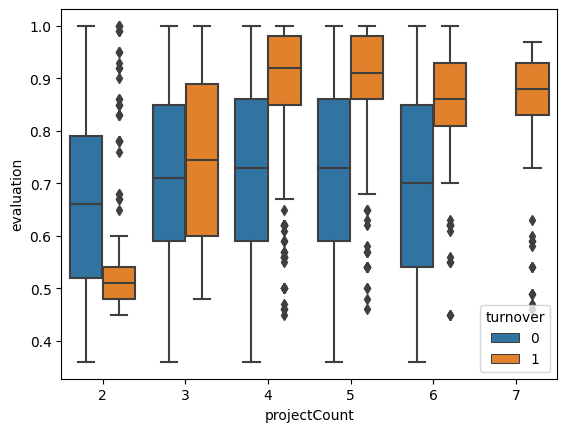

In [42]:
#ProjectCount VS Evaluation
#Looks like employees who did not leave the company had an average evaluation of around 70% even with different projectCounts
#There is a huge skew in employees who had a turnover though. It drastically changes after 3 projectCounts.
#Employees that had two projects and a horrible evaluation left. Employees with more than 3 projects and super high evaluations left
import seaborn as sns
sns.boxplot(x="projectCount", y="evaluation", hue="turnover", data=df)

##  3l. Satisfaction VS Evaluation
***
**Summary:** This is by far the most compelling graph. This is what I found:
 - There are **3** distinct clusters for employees who left the company

**Cluster 1 (Hard-working and Sad Employee):** Satisfaction was below 0.2 and evaluations were greater than 0.75. Which could be a good indication that employees who left the company were good workers but felt horrible at their job.
 - **Question:** What could be the reason for feeling so horrible when you are highly evaluated? Could it be working too hard? Could this cluster mean employees who are "overworked"?

**Cluster 2 (Bad and Sad Employee):** Satisfaction between about 0.35~0.45 and evaluations below ~0.58. This could be seen as employees who were badly evaluated and felt bad at work.
 - **Question:** Could this cluster mean employees who "under-performed"?

**Cluster 3 (Hard-working and Happy Employee):** Satisfaction between 0.7~1.0 and evaluations were greater than 0.8. Which could mean that employees in this cluster were "ideal". They loved their work and were evaluated highly for their performance.
 - **Question:** Could this cluser mean that employees left because they found another job opportunity?

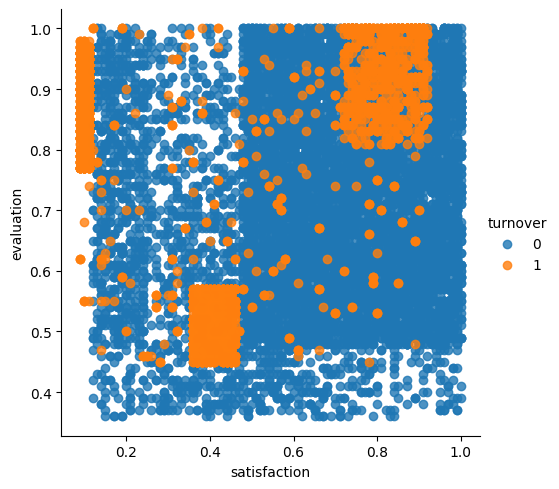

In [43]:
sns.lmplot(x='satisfaction', y='evaluation', data=df,
           fit_reg=False, # No regression line
           hue='turnover')   # Color by evolution stage

##  3m. Turnover V.S. YearsAtCompany
***
**Summary:** Let's see if theres a point where employees start leaving the company. Here's what I found:
 - More than half of the employees with **4 and 5** years left the company
 - Employees with **5** years should **highly** be looked into

**Stop and Think:**
 - Why are employees leaving mostly at the **3-5** year range?
 - Who are these employees that left?
 - Are these employees part-time or contractors?

[Text(0, 0.5, 'Percent')]

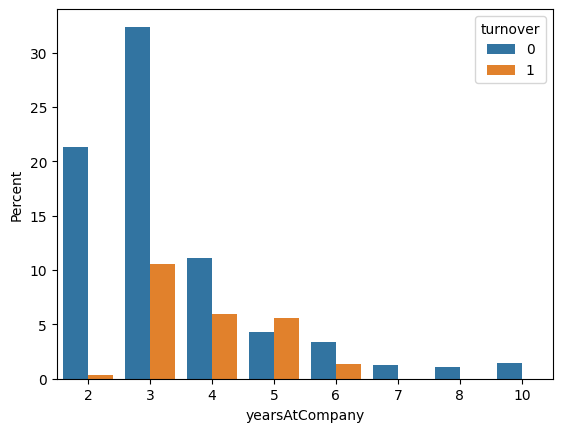

In [44]:
ax = sns.barplot(x="yearsAtCompany", y="yearsAtCompany", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")